### Exercici 1

In [108]:
import pandas as pd
import numpy as np
from numpy import random
from imblearn.over_sampling import SMOTE
import random

In [2]:
df = pd.read_csv('tennis.csv')
df.head()

/Users/psans/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,loser_age,loser_hand,loser_ioc,loser_name,loser_rank,round,surface,tourney_level,tourney_name,winner_age,winner_entry,winner_hand,winner_ht,winner_ioc,winner_name,winner_rank,winner_seed,year
0,0,17,R,CRO,Mirjana Lucic,49.0,R128,Hard,G,Australian Open,19,NaN,R,170.0,SUI,Martina Hingis,1.0,1.0,2000.0
1,1,27,R,AUS,Kerry Anne Guse,133.0,R128,Hard,G,Australian Open,17,NaN,R,167.0,BEL,Justine Henin,63.0,NaN,2000.0
2,2,31,R,USA,Jolene Watanabe Giltz,118.0,R128,Hard,G,Australian Open,26,NaN,R,NaN,SVK,Karina Habsudova,53.0,NaN,2000.0
3,3,22,R,CRO,Silvija Talaja,23.0,R128,Hard,G,Australian Open,18,NaN,R,182.0,AUS,Alicia Molik,116.0,NaN,2000.0
4,4,24,R,ITA,Rita Grande,60.0,R128,Hard,G,Australian Open,22,NaN,R,165.0,THA,Tamarine Tanasugarn,72.0,NaN,2000.0


In [3]:
final = df.copy()

In [4]:
final.drop(df[ df['round'] != 'F' ].index, inplace = True)

In [5]:
final = df[['loser_age','winner_age', 'round']].reset_index()
final = final.drop('index', 1)
final.head()

,loser_age,winner_age,round
0,17,19,R128
1,27,17,R128
2,31,26,R128
3,22,18,R128
4,24,22,R128


##### Simple random sampling. Edat mitjana de les perdedores de les finals:

In [6]:
loosers = final.sample(100)
print('Comparació de l\'edat mitjana d\'una mostra de 100:'
      '\n',loosers['loser_age'].mean(), 'anys',
      '\n','i la mitjana del total de la mostra:'
      '\n',"{:.2f}".format(final['loser_age'].mean()), 'anys')

Comparació de l'edat mitjana d'una mostra de 100:
 23.74 anys 
 i la mitjana del total de la mostra:
 23.41 anys


##### Systematic Random Sampling. Edat mitjana de les guanyadores de les finals:

In [7]:
def winners(final, step):
    x = random.randint(step)  
    indexes = np.arange(x, len(final), step=step)
    systematic_sample = final.iloc[indexes]
    return systematic_sample
winners = winners(final, 20)
winners.head()

,loser_age,winner_age,round
3,22,18,R128
23,25,24,R128
43,25,23,R128
63,24,23,R128
83,26,23,R64


In [8]:
print('Comparació de l\'edat mitjana d\'una mostra de cada 15 entrades:'
      '\n',"{:.2f}".format(winners['winner_age'].mean()), 'anys',
      '\n','i la mitjana del total de la mostra:'
      '\n',"{:.2f}".format(final['winner_age'].mean()), 'anys')

Comparació de l'edat mitjana d'una mostra de cada 15 entrades:
 23.53 anys 
 i la mitjana del total de la mostra:
 23.54 anys


### Exercici 2

##### mostra estratificada

In [9]:
df['surface'].value_counts()

Hard      28931
Clay      15159
Grass      5000
Carpet     1433
Name: surface, dtype: int64

In [10]:
#número total de la mostra estratificada
N = 200
#generar la mostra proporcionalment
df_st=df.groupby('surface', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)

In [11]:
df_st['surface'].value_counts()

Hard      114
Clay       60
Grass      20
Carpet      6
Name: surface, dtype: int64

In [12]:
print('Comparació de l\'alçada mitjana d\'una mostra estratificada per tipus de superfícies:'
      '\n',"{:.2f}".format(df_st['winner_ht'].mean()), 'anys',
      '\n','i la mitjana del total de la mostra:'
      '\n',"{:.2f}".format(df['winner_ht'].mean()), 'anys')

Comparació de l'alçada mitjana d'una mostra estratificada per tipus de superfícies:
 173.01 anys 
 i la mitjana del total de la mostra:
 173.54 anys


##### SMOTE

In [13]:
df['winner_hand'].value_counts()

R    44073
L     4139
U     2023
Name: winner_hand, dtype: int64

In [14]:
df_smote = df[['winner_hand', 'winner_rank']].copy()

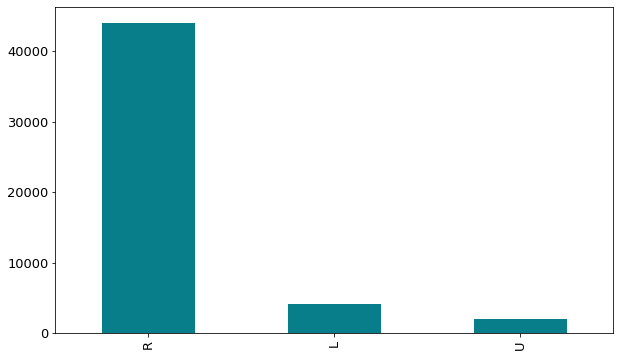

In [15]:
df_smote['winner_hand'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')

In [16]:
df_smote.drop(df_smote[ df_smote['winner_hand'] == 'U' ].index, inplace = True)

In [17]:
df_smote['winner_hand'].value_counts()

R    44073
L     4139
Name: winner_hand, dtype: int64

In [18]:
df_smote.isnull().sum()

winner_hand     339
winner_rank    1108
dtype: int64

In [19]:
df_smote.dropna(inplace=True)
df_smote.isnull().sum()

winner_hand    0
winner_rank    0
dtype: int64

In [20]:
print(df_smote.winner_hand.value_counts())

R    43352
L     4091
Name: winner_hand, dtype: int64


In [21]:
X = df_smote.drop('winner_hand', axis=1)
Y = df_smote['winner_hand']
df_smote

,winner_hand,winner_rank
0,R,1.0
1,R,63.0
2,R,53.0
3,R,116.0
4,R,72.0
...,...,...
50569,R,110.0
50570,R,5.0
50571,R,7.0
50572,R,5.0


In [22]:
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X, Y)
print(X_res, Y_res)

       winner_rank
0          1.00000
1         63.00000
2         53.00000
3        116.00000
4         72.00000
...            ...
86699     25.00000
86700    340.82352
86701     30.00000
86702    106.00000
86703      6.00000

[86704 rows x 1 columns] 0        R
1        R
2        R
3        R
4        R
        ..
86699    L
86700    L
86701    L
86702    L
86703    L
Name: winner_hand, Length: 86704, dtype: object


In [23]:
df_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Y_res)], axis=1)

print('SMOTE over-sampling:')
print(df_smote_over)

SMOTE over-sampling:
       winner_rank winner_hand
0          1.00000           R
1         63.00000           R
2         53.00000           R
3        116.00000           R
4         72.00000           R
...            ...         ...
86699     25.00000           L
86700    340.82352           L
86701     30.00000           L
86702    106.00000           L
86703      6.00000           L

[86704 rows x 2 columns]


In [24]:
df_smote_over['winner_hand'].value_counts()

R    43352
L    43352
Name: winner_hand, dtype: int64

In [25]:
print('Ranking mitjà de les guanyadores per ma dominant:\n\n',
    df_smote.groupby(['winner_hand']).mean())
print('\n\nRanking mitjà de les guanyadores per ma dominant després SMOTE:\n\n',
      df_smote_over.groupby(['winner_hand']).mean())

Ranking mitjà de les guanyadores per ma dominant:

              winner_rank
winner_hand             
L              72.053043
R              69.413868


Ranking mitjà de les guanyadores per ma dominant després SMOTE:

              winner_rank
winner_hand             
L              71.874476
R              69.413868


### Exercici 3
#### Reservoir Sampling

In [109]:
df['winner_rank'].isnull().sum()

1594

In [146]:
def reservoir_sampling(sampled_num, total_num):
    count=0
    nums = []
    for i in range(0, total_num):
        if i < sampled_num:
            nums.append(i)
        else:
            r = random.randint(0, i)
            if r < sampled_num:
                nums[r] = i
    for tt in nums:
        try:
            int(df.winner_rank.loc[[tt]]) # per evitar els valors nuls
        except:
            continue
        count=count+int(df.winner_rank.loc[[tt]])
    print('la mitjana de ranquing és: ',count/sampled_num)
    return nums
    
reservoir_sampling(50, len(df))

la mitjana de ranquing és:  78.62


[43064,
 19843,
 7966,
 25466,
 45785,
 47695,
 31918,
 18807,
 2233,
 42274,
 6600,
 23600,
 4364,
 32518,
 28020,
 44434,
 14194,
 23785,
 41035,
 33463,
 44280,
 26821,
 18608,
 2668,
 7575,
 49752,
 21326,
 17184,
 14821,
 30842,
 35183,
 15003,
 13499,
 109,
 39252,
 39806,
 15837,
 30685,
 13666,
 34371,
 7840,
 34034,
 30861,
 20302,
 34393,
 8904,
 10226,
 36891,
 21290,
 26938]